In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.svm import SVC

In [25]:
df = pd.read_csv("C:\\Users\\HP\\ML Mock\\Datasets\\emails.csv")
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.drop('Email No.', axis=1, inplace=True)

In [27]:
df.dropna(axis=1, how='any', inplace = True)

In [28]:
spam_emails = df[df['Prediction'] == 1]
# Calculate the sum of values in each column
column_sums = spam_emails.sum()

# Sort the columns based on the sum of values in descending order
sorted_columns = column_sums.sort_values(ascending=False)

# Reorder the DataFrame based on the sorted columns
df = df[sorted_columns.index]

In [50]:
column_sums

the            9839
to            10519
ect            3719
and            6236
for            4653
              ...  
military         31
allowing          8
ff             2256
dry               9
Prediction     1500
Length: 3001, dtype: int64

In [30]:
df.head()

,e,t,a,o,i,n,r,s,l,c,...,jason,centana,souza,wellhead,nominates,tisdale,responsibilities,marshall,sabrae,hplnol
0,4,4,2,0,2,0,4,3,0,3,...,0,0,0,0,0,0,0,0,0,0
1,141,91,102,131,61,70,122,95,35,68,...,0,0,0,0,0,0,0,0,0,0
2,3,3,8,5,8,8,0,2,4,4,...,0,0,0,0,0,0,0,0,0,0
3,79,49,51,48,16,23,46,36,27,50,...,0,0,0,0,0,0,0,0,0,0
4,71,63,57,58,30,42,41,19,34,37,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, e to hplnol
dtypes: int64(3001)
memory usage: 118.4 MB


In [32]:
df.describe()

,e,t,a,o,i,n,r,s,l,c,...,jason,centana,souza,wellhead,nominates,tisdale,responsibilities,marshall,sabrae,hplnol
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,84.795244,60.477765,55.517401,55.098608,45.857889,48.100735,45.412606,41.811872,30.997100,29.909126,...,0.007734,0.009667,0.005027,0.055491,0.008701,0.014501,0.006767,0.004640,0.008121,0.009281
std,126.845509,94.815319,87.574172,85.300764,77.832221,76.875463,71.567911,66.530032,47.756507,51.642923,...,0.136034,0.190429,0.102067,0.416047,0.130903,0.137604,0.123417,0.111154,0.114387,0.141513
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,12.000000,12.000000,11.000000,8.000000,10.000000,9.000000,8.000000,7.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,29.000000,28.000000,27.000000,22.000000,23.000000,22.000000,20.000000,16.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97.000000,68.000000,62.250000,63.000000,49.000000,53.000000,53.000000,46.000000,35.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2327.000000,1299.000000,1898.000000,1751.000000,972.000000,1232.000000,1555.000000,882.000000,1038.000000,1254.000000,...,5.000000,8.000000,5.000000,11.000000,2.000000,2.000000,6.000000,5.000000,3.000000,4.000000


In [14]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [51]:
df = df.iloc[:,:200]

In [52]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Prediction"])
print(X)
X.shape

        e    t    a    o   i    n    r    s   l   c  ...  price  tim  son  \
0       4    4    2    0   2    0    4    3   0   3  ...      0    0    0   
1     141   91  102  131  61   70  122   95  35  68  ...      0    3    0   
2       3    3    8    5   8    8    0    2   4   4  ...      0    0    0   
3      79   49   51   48  16   23   46   36  27  50  ...      0    0    0   
4      71   63   57   58  30   42   41   19  34  37  ...      0    0    0   
...   ...  ...  ...  ...  ..  ...  ...  ...  ..  ..  ...    ...  ...  ...   
5167   29   30   32   15  20   30   20   18   9  16  ...      0    0    0   
5168  218  190  151  128  98  119   98  101  63  70  ...      2    1    0   
5169   12   11   11    8  10    6    4   11   5   3  ...      0    0    0   
5170   45   50   28   47  39   29   25   37  10  18  ...      0    0    0   
5171  191  154  148  116  99  109   97   89  64  63  ...      2    2    0   

      company  will  fl  eat  tri  car  ms  
0           0     0   0    0  

(5172, 199)

In [53]:
Y = df["Prediction"]
print(Y)
Y.shape

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64


(5172,)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

(3879, 199)
(3879,)


In [62]:
import matplotlib.pyplot as plt

# 1. Using KNN

In [58]:
error_rate=[]

for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error rate')

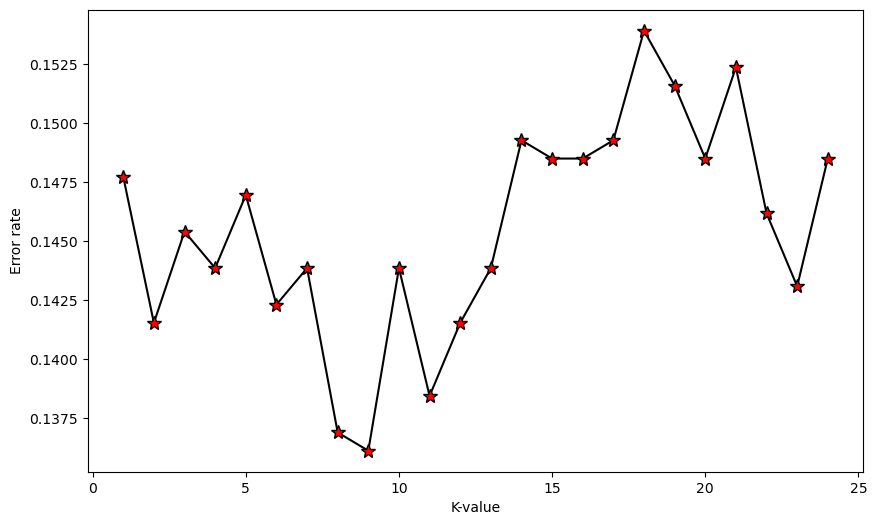

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='black',linestyle='-',markersize=10,markerfacecolor='red',marker='*')
plt.xlabel('K-value')
plt.ylabel('Error rate')

In [64]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test)

# Calculate the accuracy of the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy * 100)


KNN Accuracy: 86.38824439288476


# 2.Using SVM

In [67]:
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Calculate the accuracy of the SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy * 100)

SVM Accuracy: 93.27146171693735


In [68]:
# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9242072699149265
Confusion Matrix:
 [[875  38]
 [ 60 320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       913
           1       0.89      0.84      0.87       380

    accuracy                           0.92      1293
   macro avg       0.91      0.90      0.91      1293
weighted avg       0.92      0.92      0.92      1293

